In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
df = pd.read_csv('../cruft/om-2023-12-22-2024-02-07.csv')
df = df[df['date'].str.contains('00:00:00|06:00:00|12:00:00|18:00:00')]
df = df[df['date'] < '2024-01-01 12:00:00']
df = df[df['date'] > '2023-12-22 06:00:00']


In [5]:
dataset = xr.open_dataset('../cruft/20231222-era5.nc')
selected_data = dataset.sel(latitude=-37.814, longitude=144.9633, method='nearest')
times = selected_data.time.values[:-1]
t2m = selected_data.t2m.values.flatten()[:-1]
df['era5_2m'] = t2m - 273.15

In [8]:
gc = xr.open_dataset('../cruft/pred/2m.nc')
gc = gc.sel(latitude=-37.814, longitude=144.9633, method='nearest')
df['gc_2m'] = gc['t2m'].values.flatten() - 273.15


In [9]:
df

,Unnamed: 0,date,temperature_2m_reanalysis,temperature_2m_forcast,era5_2m,gc_2m
12,12,2023-12-22 12:00:00,16.75,14.605000,15.371063,16.093903
18,18,2023-12-22 18:00:00,16.15,13.455000,10.788605,12.181427
24,24,2023-12-23 00:00:00,16.40,18.905000,19.261932,20.049835
30,30,2023-12-23 06:00:00,16.70,18.605000,23.056702,22.720154
36,36,2023-12-23 12:00:00,16.55,14.505000,15.270569,14.525665
42,42,2023-12-23 18:00:00,16.85,14.155000,12.749298,12.181885
48,48,2023-12-24 00:00:00,16.45,18.955000,19.119873,20.131653
54,54,2023-12-24 06:00:00,17.05,16.005001,21.786346,18.984955
60,60,2023-12-24 12:00:00,17.25,15.605000,16.708252,15.662354
66,66,2023-12-24 18:00:00,17.60,16.405000,16.368378,15.147034


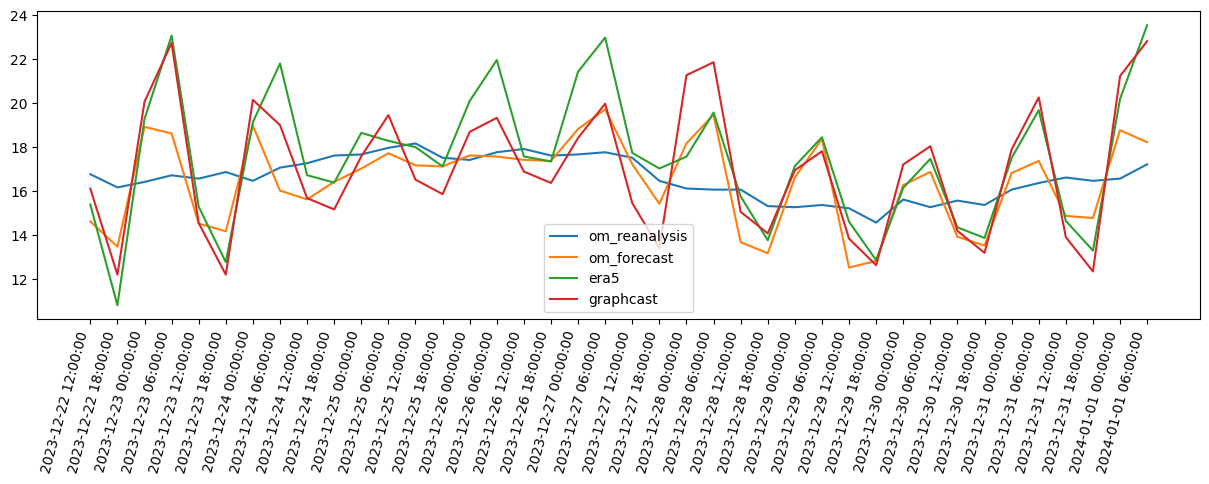

In [10]:
plt.figure(figsize=(15,4))

plt.plot(df['date'], df['temperature_2m_reanalysis'])
plt.plot(df['date'], df['temperature_2m_forcast'])
plt.plot(df['date'], df['era5_2m'])
plt.plot(df['date'], df['gc_2m'])
plt.xticks(rotation=75, ha='right')
plt.legend(['om_reanalysis', 'om_forecast', 'era5', 'graphcast'])
print()

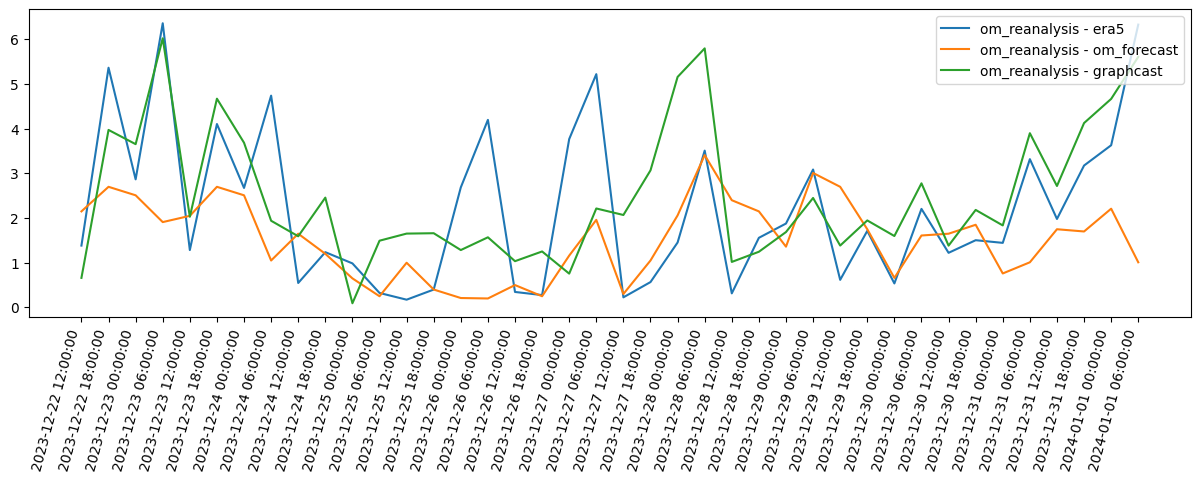

In [13]:
plt.figure(figsize=(15,4))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['era5_2m']))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['temperature_2m_forcast']))
plt.plot(df['date'], abs(df['temperature_2m_reanalysis'] - df['gc_2m']))

plt.xticks(rotation=75, ha='right')
plt.legend(['om_reanalysis - era5', 'om_reanalysis - om_forecast', 'om_reanalysis - graphcast'])

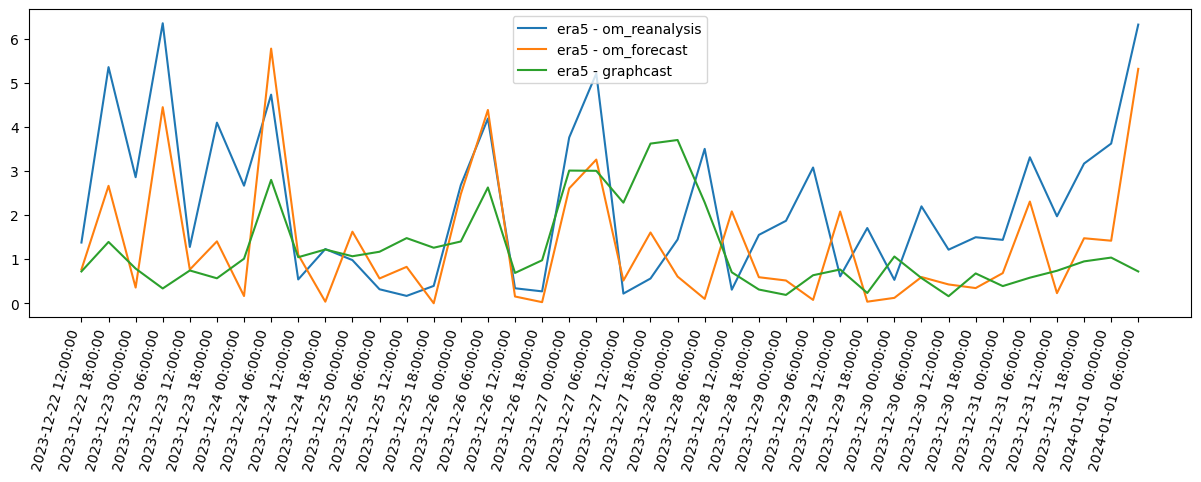

In [18]:
plt.figure(figsize=(15,4))
plt.plot(df['date'], abs(df['era5_2m'] - df['temperature_2m_reanalysis']))
plt.plot(df['date'], abs(df['era5_2m'] - df['temperature_2m_forcast']))
plt.plot(df['date'], abs(df['era5_2m'] - df['gc_2m']))

plt.xticks(rotation=75, ha='right')
plt.legend(['era5 - om_reanalysis', 'era5 - om_forecast', 'era5 - graphcast'])

In [15]:
print("mean delta reanalysis vs era5: ", abs(df['temperature_2m_reanalysis'] - df['era5_2m']).mean())
print("mean delta reanalysis vs forecast: ", abs(df['temperature_2m_reanalysis'] - df['temperature_2m_forcast']).mean())
print("mean delta reanalysis vs graphcast: ", abs(df['temperature_2m_reanalysis'] - df['gc_2m']).mean())

mean delta reanalysis vs era5:  2.2255960083007813
mean delta reanalysis vs forecast:  1.53025
mean delta reanalysis vs graphcast:  2.503440704345703


In [17]:
print("mean delta era5 vs forcast: ", abs(df['era5_2m'] - df['temperature_2m_forcast']).mean())
print("mean delta era5 vs graphcast: ", abs(df['era5_2m'] - df['gc_2m']).mean())


mean delta era5 vs forcast:  1.364723083496094
mean delta era5 vs graphcast:  1.2243935
